# Predicting Future Population Trends of the UK
Based on data from 1950-2020, we build a regression model to predict the population from 2020-2030.


Both Linear regression and polynomial regression techniques are trialled.



In [1]:
#%load import.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('UK_Population_Data.csv')
data.head()

,Location,Time,PopMale,PopFemale,PopTotal,PopDensity
0,United Kingdom,1950,24337.403,26278.616,50616.019,209.218
1,United Kingdom,1951,24318.326,26283.600,50601.926,209.159
2,United Kingdom,1952,24340.296,26310.977,50651.273,209.363
3,United Kingdom,1953,24393.893,26357.087,50750.980,209.775
4,United Kingdom,1954,24471.764,26419.147,50890.911,210.354


Taking a look at the dataset....

In [3]:
%matplotlib inline 
#sns.scatterplot(x='Time', y='PopTotal', data=data)

In [4]:
#sns.lineplot(x='Time', y='PopMale', data=data, label='Male Population')
#sns.lineplot(x='Time', y='PopFemale', data=data, label='Female Population')
#plt.xlabel("time", fontsize = 10)
#plt.legend(fontsize=10)

## Predicting future population total, using Linear Regression

In [5]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x=data['Time']
y=data['PopTotal']

x=x[:, np.newaxis]
y=y[:, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

regr= LinearRegression()
regr.fit(x_train, y_train)

predictions= regr.predict(x_test)

#Metrics
print('MSE: %.3f' % metrics.mean_squared_error(y_test, predictions))
print('R^2: %.3f' % metrics.r2_score(y_test, predictions))

MSE: 1518905.587
R^2: 0.886


This model obtains an R squared value of 0.886, which is relatively good, but lets see how it performs on new predicitions....

Firstly plotting the data alongside the regression line, along with the 95% confidence interval...

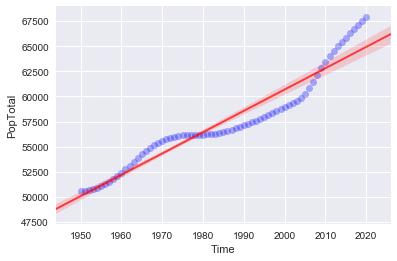

In [6]:
sns.set()
sns.regplot(x='Time', y='PopTotal', fit_reg=True,data=data, 
            scatter_kws = {"color": "b", "alpha": 0.3},
            line_kws={"color":"r","alpha":0.7,"lw":2})

Providing the model with new data, which is the years 2021-2030.

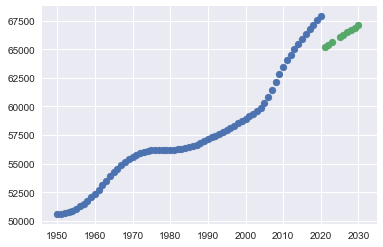

In [7]:
new_x=np.array([2021,2022,2023,2025,2026,2027,2028,2029,2030])
new_x=new_x[:, np.newaxis]

new_predictions=regr.predict(new_x)

plt.scatter(data['Time'], data['PopTotal'])
plt.scatter(new_x, new_predictions)
#sns.lineplot(x=new_x, y=new_predictions)

The model doesnt seem to perform well on these new predictions! if the predictions are following the regression line, this leads to underestimation.

Next we can look at using a polynomial regression model....

## Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

x=data['Time']
y=data['PopTotal']

x=x[:, np.newaxis]
y=y[:, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

regrP= LinearRegression()
regrP.fit(x_poly_train, y_train)
predictionsP=regrP.predict(x_poly_test)

print('R^2: %.3f' % metrics.r2_score(y_test, predictionsP))

R^2: 0.922


The R squared value for this model is 0.922, so a lot better than our linear regression model. Lets see how it performs with new data....

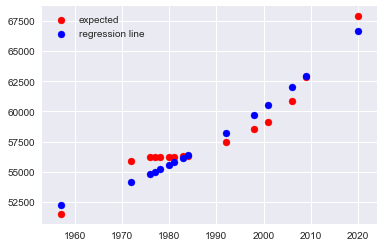

In [9]:
%matplotlib inline

plt.scatter(x_test, y_test, color='red', label='expected')
plt.scatter(x_test, predictionsP, color='blue', label='regression line')
plt.legend()
plt.show()

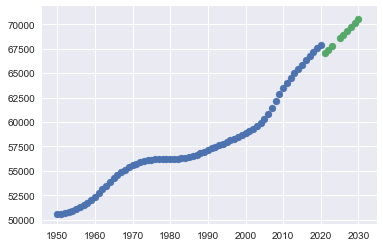

In [10]:
new_x=np.array([2021,2022,2023,2025,2026,2027,2028,2029,2030])
new_x=new_x[:, np.newaxis]

x_poly_new = polynomial_features.fit_transform(new_x)

new_predictionsP=regrP.predict(x_poly_new)
#print(new_predictionsP)
plt.scatter(data['Time'], data['PopTotal'])
plt.scatter(new_x, new_predictionsP)

Much better! The model is no longer underestimating the population values to such a great extent